
# <div align=center> This notebooks hopes to analyze data available on kaggle </div> 

### This study hopes to achieves the following 

<ul>
  <li>Statistical Analysis</li>
  <li>Machine Learning</li>
  <li>Model compression</li>
</ul>

### Data used

<ul>
  <li> https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset</li>
</ul>

#### Luis E. Fernandez

In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter
from scipy import stats as sp
from copy import deepcopy
from numpy.typing import ArrayLike
import matplotlib.colors as mcolors

In [151]:
data_path = pathlib.Path("Datasets/student_info.csv")
data = pd.read_csv(data_path)

data.head(3)

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail


# Data exploration
## Let's see how diverse each column is 

### Analyzing how distributed the qualitative columns are

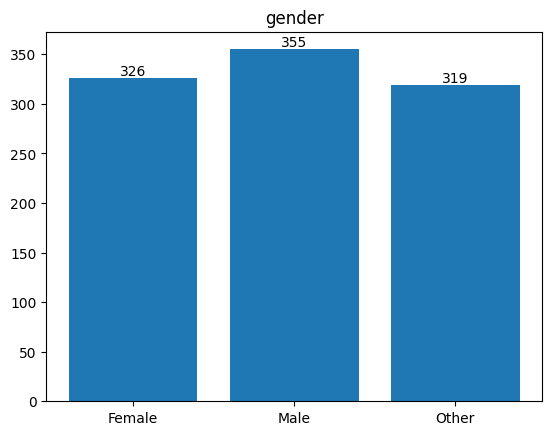

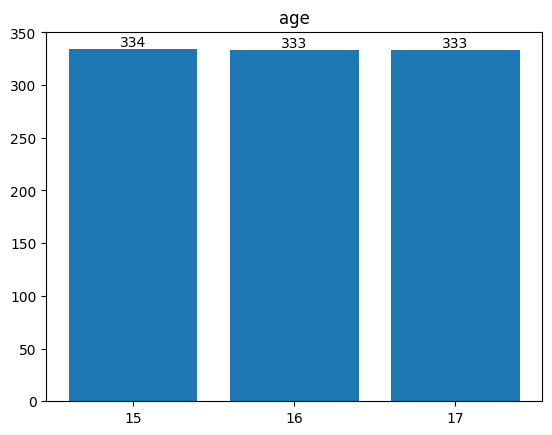

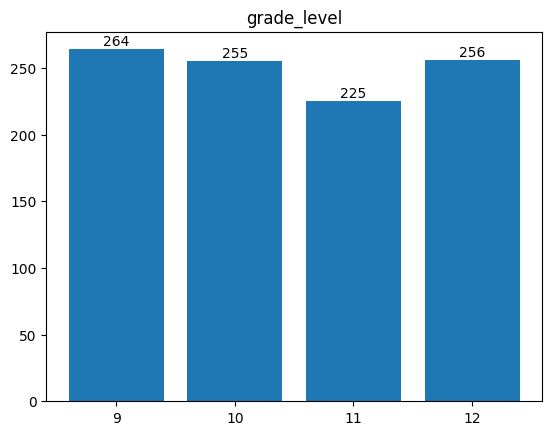

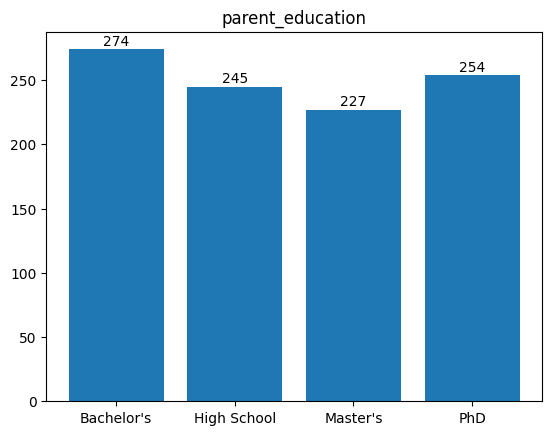

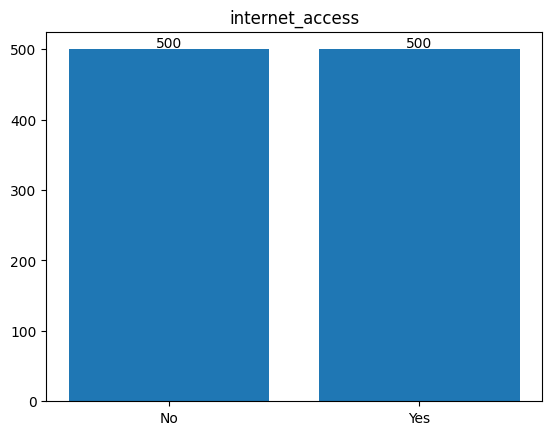

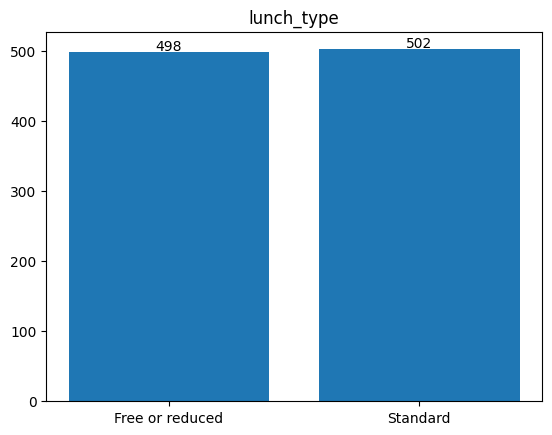

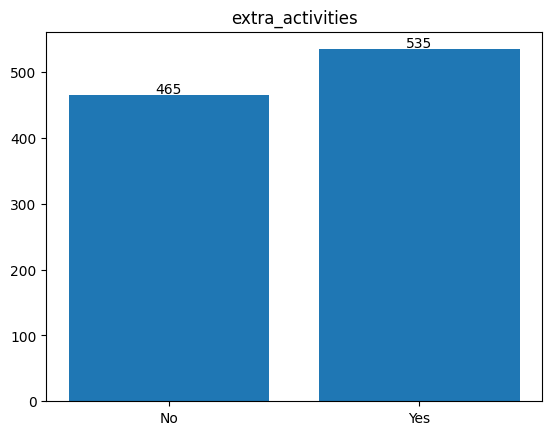

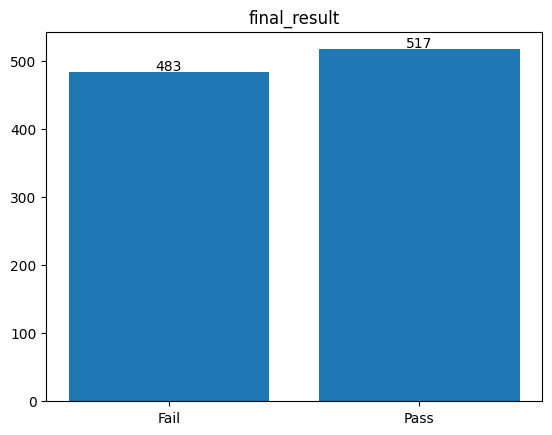

In [6]:
#start from the third column since the first two are identifiers 

#TODO: remove first two columns before analyzing data (unique identifier columns)
qualitative = ['gender','age','grade_level','parent_education','internet_access', 'lunch_type', 'extra_activities','final_result']
quantitative = ['math_score', 'reading_score','writing_score', 'attendance_rate','study_hours']

for column in data[qualitative]:
    data_counter = Counter(data[column])

    unique_values = sorted(data_counter.keys())
    count_values = [data_counter[key] for key in unique_values]

    b = plt.bar(range(len(unique_values)), count_values, tick_label = unique_values, align='center')
    for bar in b:
        # print(bar.__dict__)
        plt.text(bar._x0 + bar._width/2, bar._height+3, bar._height, ha = 'center')
    plt.title(str(column))
    plt.show()


# TODO: THIS

In [16]:
help(sp.skewnorm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.skewnorm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional
    
        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a 

# Analyzing metrics
<ul>
  <li>Samples</li>
  <li>Minimum</li>
  <li>Maximum</li>
  <li>Range</li>
  <li>quantiles</li>
  <li>Mean</li>
  <li>Mode</li>
  <li>Median</li>
  <li>Standard Deviation</li>
  <li>Variance</li>
  <li>Skew</li>
  <li>Kurtosis</li>
  <li>Covariance</li>
  <li>Correlation</li>
</ul>



# Samples, Minimum, Maximum, Range

### * Samples represent how many datapoints are in a distribution, list, and/or dataset
### * The minimum is the lowest value in a given distribution, list, and/or dataset.
### * The maximum is the highest value in a given distribution, list, and/or dataset.
### * The range is the highest value minus the lowest value (maximum - minimum), meant to represent how distributed the distribution, list, and/or dataset is

In [62]:
# For example take the following list:
list_values = np.linspace(1,10,19).tolist()
print(list_values)

print(f"The number of samples for this list is: {len(list_values)}")
print(f"The minimum for this list is: {min(list_values)}")
print(f"The maximum for this list is: {max(list_values)}")
print(f"The range for this list is: {max(list_values) - min(list_values)}")

# Now what would happen if we add a minimum and maximum far from the concentraded values?

list_values.append(-1000)
list_values.append(1000)
list_values = sorted(list_values)

print("\n",list_values)
print(f"The number of samples for this list is: {len(list_values)}")
print(f"The minimum for this list is: {min(list_values)}")
print(f"The maximum for this list is: {max(list_values)}")
print(f"The range for this list is: {max(list_values) - min(list_values)}")


[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
The number of samples for this list is: 19
The minimum for this list is: 1.0
The maximum for this list is: 10.0
The range for this list is: 9.0

 [-1000, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 1000]
The number of samples for this list is: 21
The minimum for this list is: -1000
The maximum for this list is: 1000
The range for this list is: 2000


## Conclusion 

### As we can see the minimum, maximum and range are pretty simple to calculate and are meant to give us a simple view at how spread out the data is. 
### These values are very susceptible to outliers as we can see above. 

# Median, quantiles, mode, mean


### Median: the middle value in a distribution, list, and/or dataset
### Quantile: the 25th, 50th (median), and 75th percent quantiles 
### Mode: the most frequent value
### Mean: 
* Arithmetic mean: the sum of all values divided by the number of samples
* Geometric mean:
* harmonic mean: 

In [71]:
# Using the same list as before we calculate the median and quantiles
# To calculate the median we need to sort the list in ascending order before calculating it. 

# list_values = [1,2,3]

# list_values.append(0)
list_values = sorted(list_values)
print(list_values)

if len(list_values)%2 == 0:
    print("The middle value is not in the middle")

    middle_value = np.floor((len(list_values)+1)/2)
    print(middle_value, (list_values[int(middle_value)-1] + list_values[int(middle_value)])/2 , np.median(list_values))
else:
    print("The middle value is in the middle")
    middle_value = np.round(len(list_values)/2,0)

    print(middle_value, list_values[int(middle_value)], np.median(list_values))

# we will be using the numpy functions going forward, this was just to demonstrate what happens when we find the median of a list with even amount of samples

# Now we calculate quantiles which is the value at 25th, 50th, 75th percent quantile

print(f"The 25th quantile is {np.quantile(list_values, 0.25)}")
print(f"The 50th quantile is {np.quantile(list_values, 0.50)}, the same as the median")
print(f"The 75th quantile is {np.quantile(list_values, 0.75)}")


# The mode is the most frequent datapoint in a list
print(f"The mode is {sp.mode(list_values).mode} with frequency {sp.mode(list_values).count}")

# The mean (usually the Arithmetic mean) is the sum of all values divided by the number of samples 

print(f"The mean is {sum(list_values)/len(list_values)}, from numpy: {np.mean(list_values)}")

[-1000, 0, 0, 0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 1000]
The middle value is not in the middle
12.0 4.75 4.75
The 25th quantile is 1.875
The 50th quantile is 4.75, the same as the median
The 75th quantile is 7.625
The mode is 0.0 with frequency 3
The mean is 4.354166666666667, from numpy: 4.354166666666667


# Standard Deviation, Variance, Skew, Kurtosis

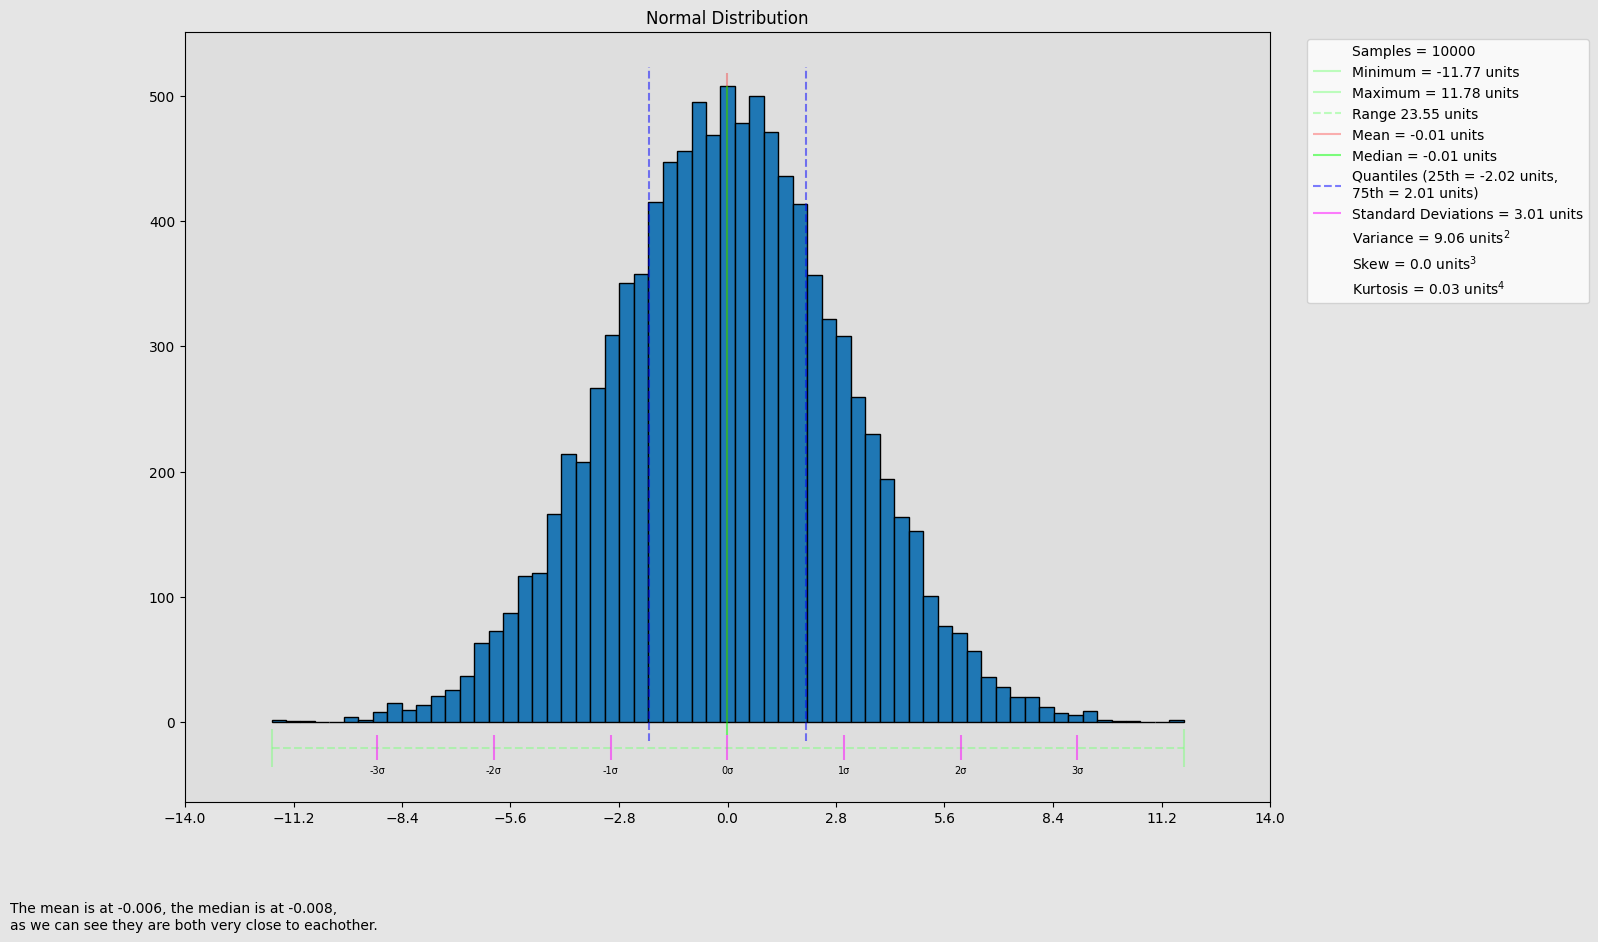

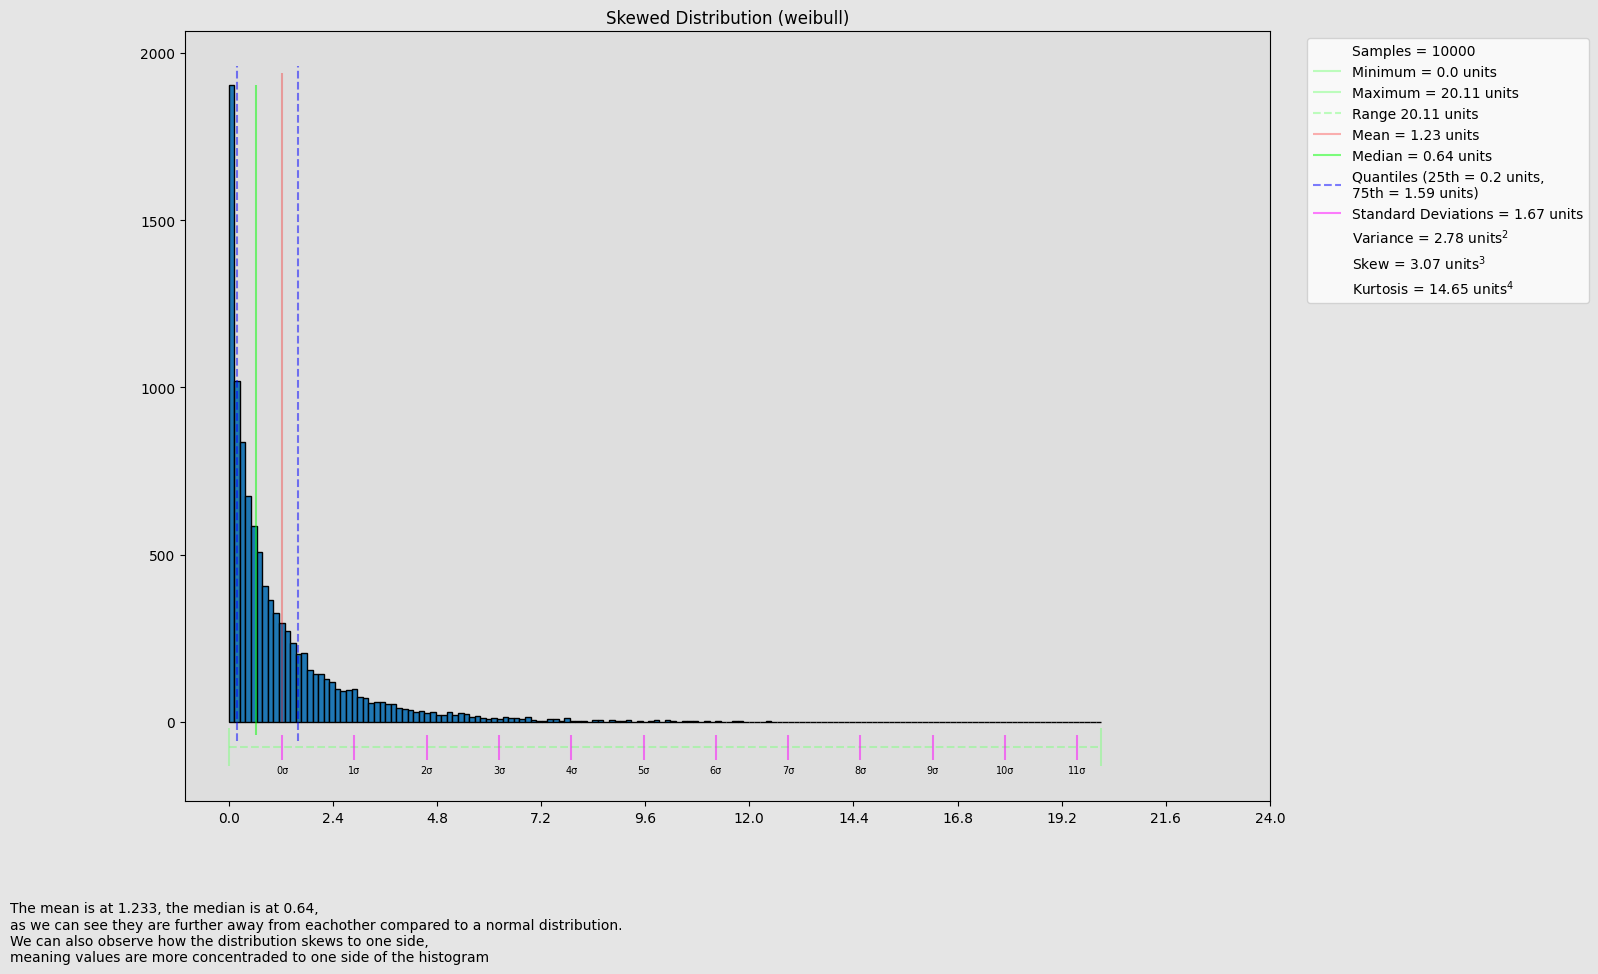

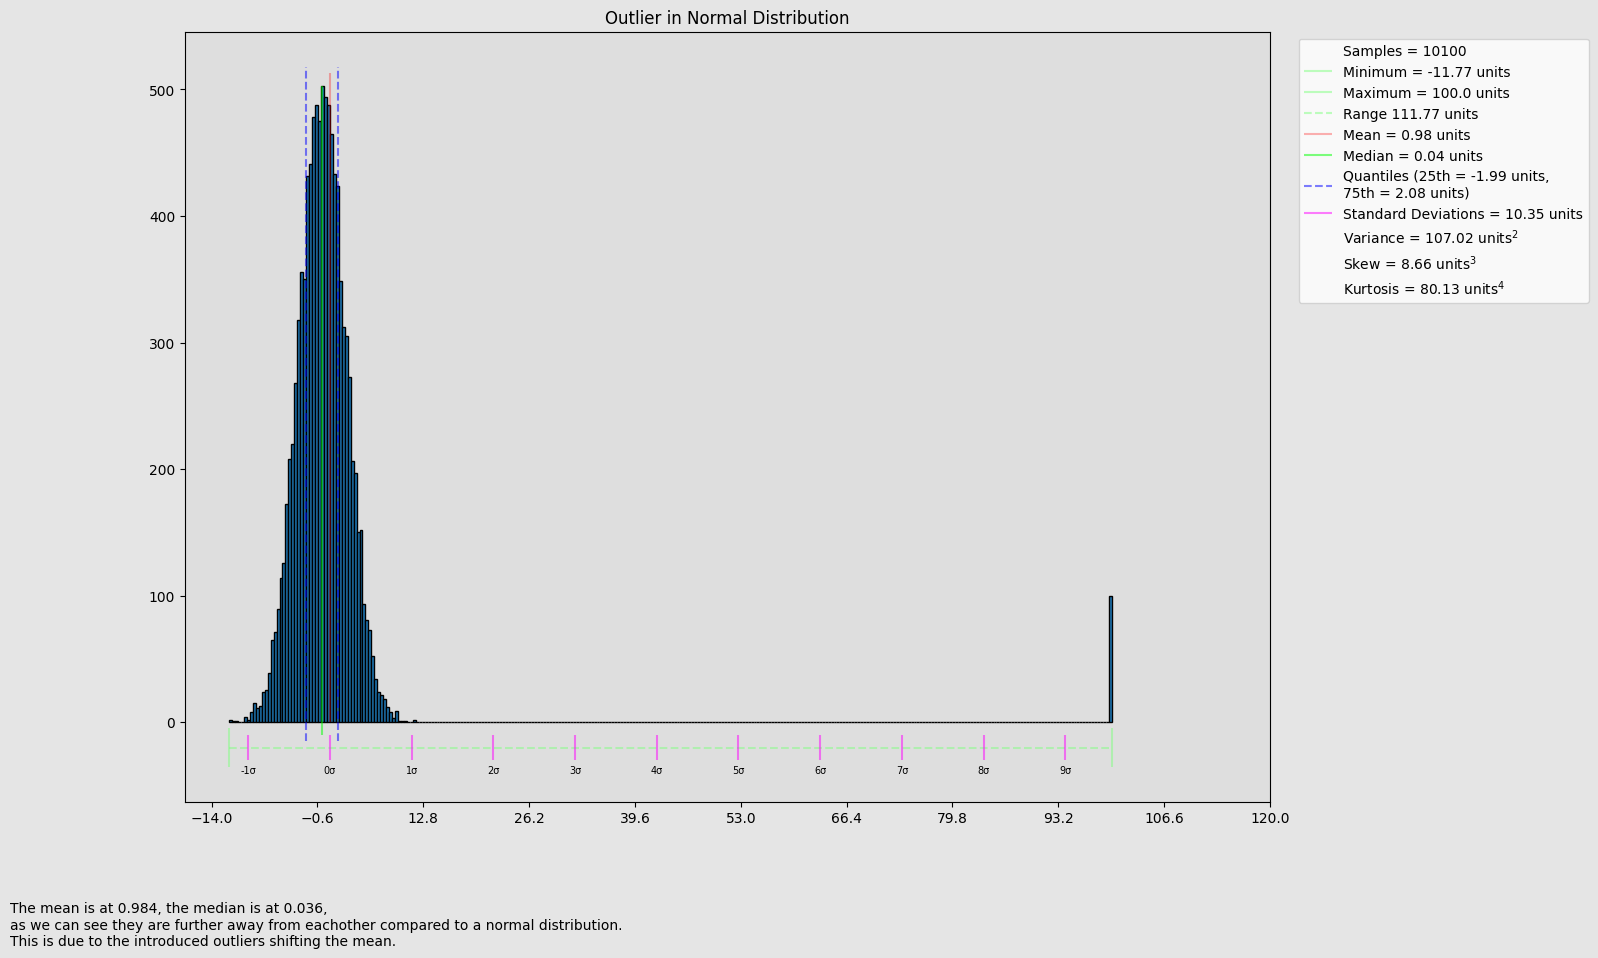

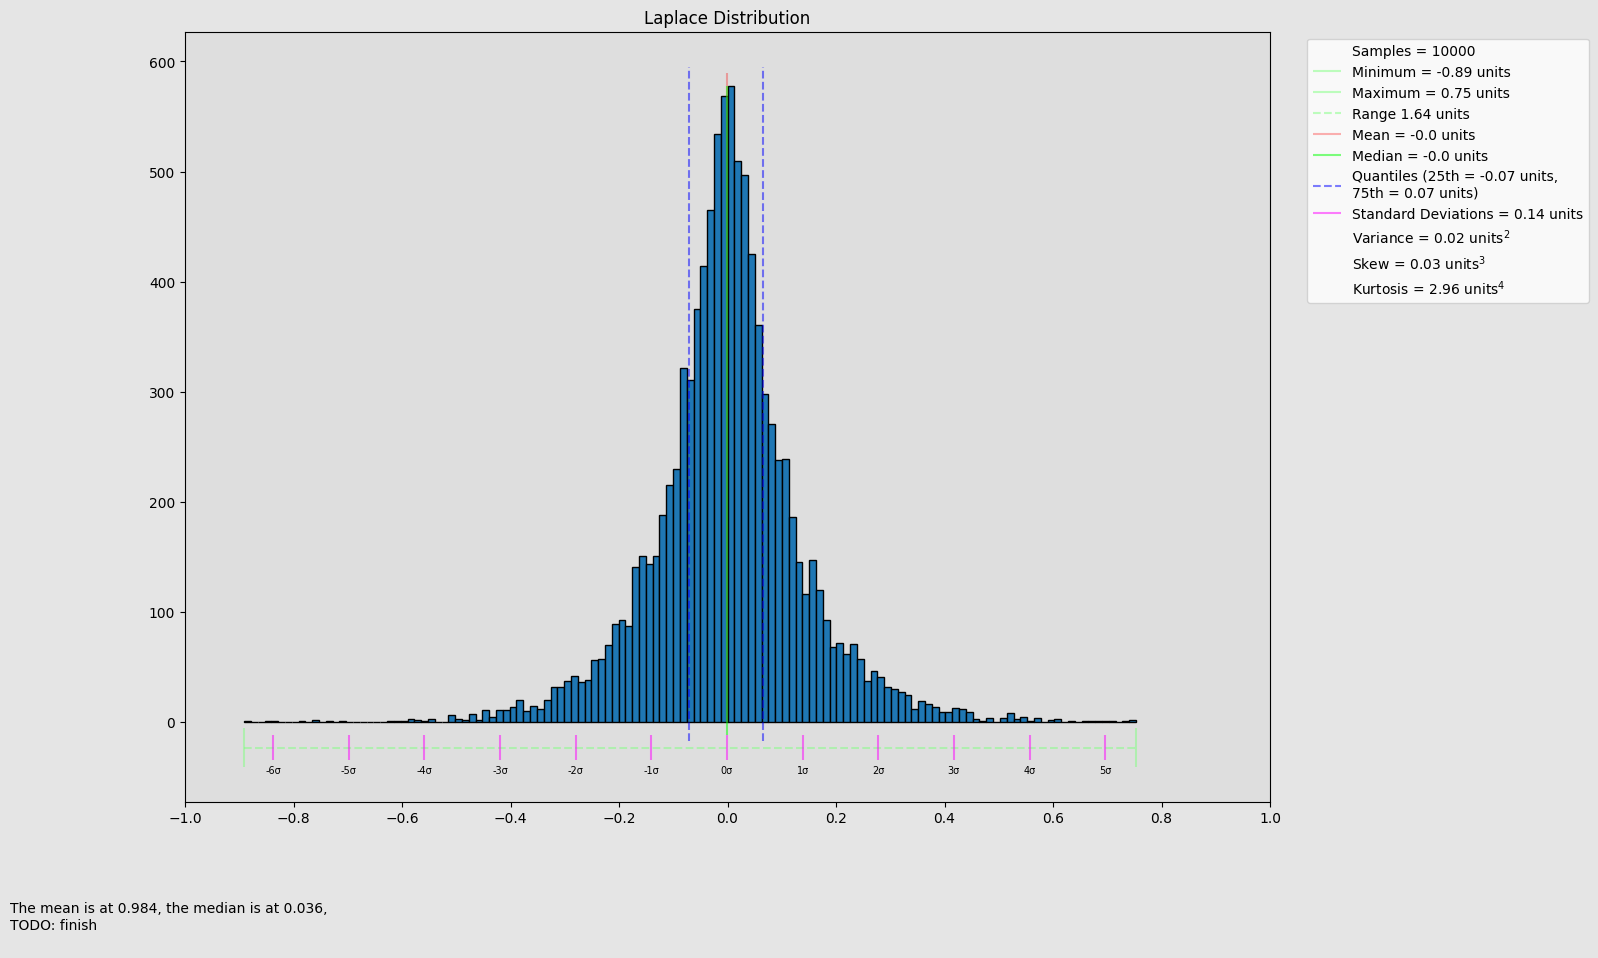

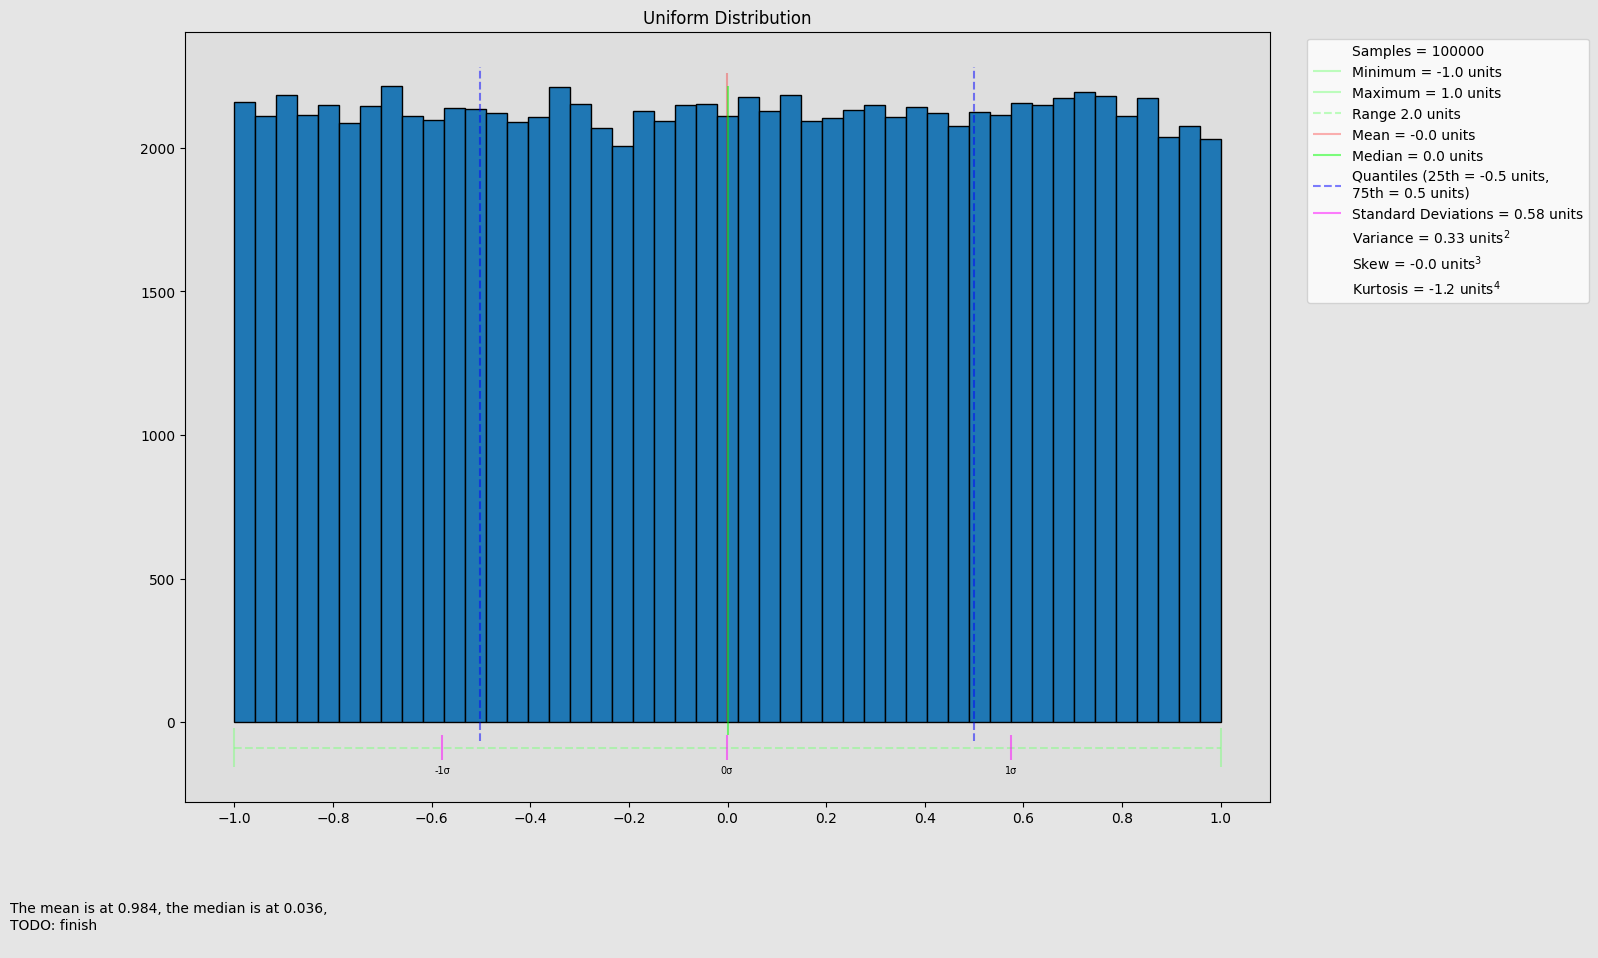

In [11]:
from matplotlib.lines import Line2D

def plot_histogram(list_values, title, message, sample = True, units = "units",list_bins = False):
    fig = plt.figure(figsize=(14,10), facecolor=(0.9,0.9,0.9))
    n,bins,_ = plt.hist(list_values,edgecolor = [[0,0,0]], bins='auto',align='mid')
    ax = plt.gca()
    ax.set_facecolor((0.85,0.85,0.85,0.5))
    samples = len(list_values)
    max_value = max(list_values)
    min_value = min(list_values)
    max_list_count = max(n)
    mean = np.mean(list_values)
    median = np.median(list_values)
    variance = np.var(list_values, ddof=1 if sample else 0)
    standard_deviation = np.sqrt(variance)
    skew = sp.skew(list_values)
    kurtosis = sp.kurtosis(list_values)
    if list_bins:
        for i, (height, bin) in enumerate(zip(n,bins)):
            if height != 0:
                plt.text((np.round(bin,2)+np.round(bins[i+1],2))/2, float(height)+30, f"[{np.round(bin,2)}, {np.round(bins[i+1],2)})", fontsize= 7, horizontalalignment = 'center')
    plt.plot([], [],color='none', label=f"Samples = {samples}")
    plt.vlines(min_value, -0.07*max_list_count,-0.01*max_list_count, ((0.5,1,0.5, 0.5)), label = f"Minimum = {np.round(min_value,2)} {units}")
    plt.vlines(max_value, -0.07*max_list_count,-0.01*max_list_count, ((0.5,1,0.5, 0.5)), label = f"Maximum = {np.round(max_value,2)} {units}")
    plt.hlines(-0.04*max_list_count, min_value, max_value, colors=((0.5,1,0.5, 0.5)), label=f"Range {np.round(max_value - min_value,2)} {units}", linestyles='dashed')
    plt.vlines(mean, 0, max_list_count+0.02*max_list_count, ((1,0,0, 0.3)), label=f"Mean = {np.round(mean,2)} {units}")
    plt.vlines(median, -0.02*max_list_count, max_list_count, ((0,1,0, 0.5)), label=f"Median = {np.round(median,2)} {units}")
    plt.vlines([np.quantile(list_values, 0.25), np.quantile(list_values, 0.75)], -0.03*max_list_count, max_list_count+0.03*max_list_count, ((0,0,1, 0.5)), 
               label=f"Quantiles (25th = {np.round(np.quantile(list_values, 0.25),2)} {units}, \n75th = {np.round(np.quantile(list_values, 0.75),2)} {units})", linestyles='dashed')
    # plt.text(((max_value + min_value)/2), -0.09*max_list_count, "Range", ha='center')
    plt.vlines(mean, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid', label=f"Standard Deviations = {np.round(standard_deviation,2)} {units}")
    plt.text(mean, -0.08*max_list_count, f"0{"σ" if sample else "S"}", fontsize = 7, ha='center')
    i = 1
    while (mean - standard_deviation*i >= min_value) or (mean + standard_deviation*i <= max_value):
        if mean - standard_deviation*i >= min_value:
            plt.vlines(mean - standard_deviation*i, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid')
            plt.text(mean - standard_deviation*i, -0.08*max_list_count, f"-{i}{"σ" if sample else "S"}", fontsize = 7, ha='center')
        if mean + standard_deviation*i <= max_value:
            plt.vlines(mean + standard_deviation*i, -0.06*max_list_count,-0.02*max_list_count, ((1,0,1,0.5)), linestyles='solid')
            plt.text(mean + standard_deviation*i, -0.08*max_list_count, f"{i}{"σ" if sample else "S"}", fontsize = 7, ha='center')
        i+=1

    # Create a dummy legend entry that looks like plain text
    plt.plot([], [],color='none', label=f"Variance = {np.round(variance,2)} {units}$^2$")
    plt.plot([], [],color='none', label=f"Skew = {np.round(skew,2)} {units}$^3$")
    plt.plot([], [],color='none', label=f"Kurtosis = {np.round(kurtosis,2)} {units}$^4$")
    fig.set_facecolor((0.8,0.8,0.8,0.5))
    plt.figtext(0,0.01,message, ha='left', va='top', fontsize=10)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.3,1))
    plt.xticks(np.linspace(np.round(1.2*min_value,0), np.round(1.2*max_value,0), 11))
    # plt.grid(True, 'both','x', color = ((0.01,0.01,0.01,0.1)))
    plt.show()

np.random.seed(42)


normal_list = np.random.normal(0,3,10000)
title = "Normal Distribution"
message = f"""The mean is at {np.round(np.mean(normal_list),3)}, the median is at {np.round(np.median(normal_list),3)}, 
as we can see they are both very close to eachother."""
plot_histogram(normal_list, title, message)

skewed_list = np.random.weibull(0.75, 10000)

title = "Skewed Distribution (weibull)"
message = f"""The mean is at {np.round(np.mean(skewed_list),3)}, the median is at {np.round(np.median(skewed_list),3)}, 
as we can see they are further away from eachother compared to a normal distribution. 
We can also observe how the distribution skews to one side, 
meaning values are more concentraded to one side of the histogram"""
plot_histogram(skewed_list, title, message)

outlier_list = deepcopy(normal_list)
outlier_list = np.append(outlier_list, [100]*100)

title = "Outlier in Normal Distribution"
message = f"""The mean is at {np.round(np.mean(outlier_list),3)}, the median is at {np.round(np.median(outlier_list),3)}, 
as we can see they are further away from eachother compared to a normal distribution. 
This is due to the introduced outliers shifting the mean."""
plot_histogram(outlier_list, title, message)


laplace = np.random.laplace(0,0.1,10000)
title = "Laplace Distribution"
message = f"""The mean is at {np.round(np.mean(outlier_list),3)}, the median is at {np.round(np.median(outlier_list),3)}, 
TODO: finish
"""
plot_histogram(laplace, title, message)

uniform = np.random.uniform(-1,1,100000)
title = "Uniform Distribution"
message = f"""The mean is at {np.round(np.mean(outlier_list),3)}, the median is at {np.round(np.median(outlier_list),3)}, 
TODO: finish
"""
plot_histogram(uniform, title, message)



### Standard Deviation:
### Variance:
### Skew: 
### Kurtosis 

# Functions

In [ ]:
# TODO:
'''Create a function the prints the following:
    * Mean
    * Mode
    * Median
    * Standard Deviation
    * Variance 
    * skew
    * kurtosis 
    '''


def statAnalysis( *array : ArrayLike, col_name : str | list | ArrayLike | None = None, sample:bool = True)->str:

    if not col_name:
        col_name = [""] * len(array)
    elif isinstance(col_name,str):
        col_name = [col_name]
    assert (len(array) == len(col_name)), "array and col_names length don't match"

    stats_string = ""
    for i, (data, name) in enumerate(zip(array,col_name), start=1):

        stats_string += f"\n{i}. {name}\n"
        samples = len(data)
        min = np.min(data)
        max = np.max(data)
        data_range = max - min
        mean = np.mean(data)
        mode = sp.mode(data)
        median = np.median(data)
        standard_dev = np.std(data, ddof=1) if sample else np.std(data)
        variance = standard_dev**2
        skew = sp.skew(data)
        kurtosis = sp.kurtosis(data)

        stats_string += f"""
        samples: {samples}
        min: {min}
        max: {max}
        range: {data_range}
        mode: {mode.mode} - frequency: {mode.count}
        mean: {mean}
        median: {median}
        standard deviation: {np.round(standard_dev,5)}
        variance: {np.round(variance,5)}
        skew: {skew}
        kurtosis: {kurtosis}"""



    return stats_string


def cov_corr_analysis( *array : list | ArrayLike, col_name = None)->str:

    if not col_name:
        col_name = [""] * len(array)
    elif isinstance(col_name,str):
        col_name = [col_name]
    assert (len(array) == len(col_name)), "array and col_names length don't match"

    lengths = [len(arr) for arr in array]
    if len(set(lengths)) == 1 and len(lengths) != 1:
        
        covariance = np.cov(array)

        stats_string = f"Covariance\n {covariance}"

        correlation = np.corrcoef(array)

        stats_string += f"\nCorrelation\n {correlation}"
    
    return stats_string





a =  [1,2,3,4,5,6,7]
a2 = [2,3,4,5,6,7,8]
a3 = [-1,-2,-3,-4,-5,-6,-7]
b = [1,1,2,3,4,5,6,6]
c = np.round(np.random.uniform(0,12, 10000),4)
d = np.round(np.random.normal(6, 1, 10000),4)
e = np.round(np.array(sp.skewnorm.rvs(7,size=10000, loc = 6, scale=3)),4)
f = deepcopy(e)
f= np.append(f, [10000]*30)
# plt.hist(c)
# plt.show()
# plt.clf()
# plt.hist(d)
# plt.show()
# plt.clf()
# plt.hist(e)
# plt.show()
# plt.clf()
# plt.hist(f)
# plt.show()
# plt.clf()

# print(statAnalysis(a, col_name="test"))
# print(statAnalysis(b))
# print(statAnalysis(c,col_name="uniform"))
# print(statAnalysis(d,col_name="normal"))
# print(statAnalysis(e,col_name="skew-norm"))
# print(statAnalysis(f,col_name="skew-norm-mean-median"))
# print(statAnalysis(a,a2,a3, col_name=["FIRST", "SECOND", "THIRD"]))
print(statAnalysis(a,d,e,f, col_name=["FIRST", "SECOND", "THIRD", "FOURTH"]))

print(cov_corr_analysis(a,a2,a3, col_name=["FIRST", "SECOND", "THIRD"]))




1. FIRST

        samples: 7
        min: 1
        max: 7
        range: 6
        mode: 1 - frequency: 1
        mean: 4.0
        median: 4.0
        standard deviation: 2.16025
        variance: 4.66667
        skew: 0.0
        kurtosis: -1.25
2. SECOND

        samples: 10000
        min: 2.5301
        max: 9.7814
        range: 7.2513
        mode: 5.172 - frequency: 4
        mean: 5.994347699999999
        median: 5.99625
        standard deviation: 1.00478
        variance: 1.00959
        skew: 0.010181361273152008
        kurtosis: 0.03831954456084885
3. THIRD

        samples: 10000
        min: 4.8077
        max: 17.1749
        range: 12.3672
        mode: 5.8333 - frequency: 3
        mean: 8.349824490000001
        median: 8.01895
        standard deviation: 1.83387
        variance: 3.36308
        skew: 0.8852327447549989
        kurtosis: 0.6448609876695417
4. FOURTH

        samples: 10030
        min: 4.8077
        max: 10000.0
        range: 9995.1923
       

# Analyzing quantitative columns

math_score:
mean: 75.165 
standard deviation: 14.297194654896463


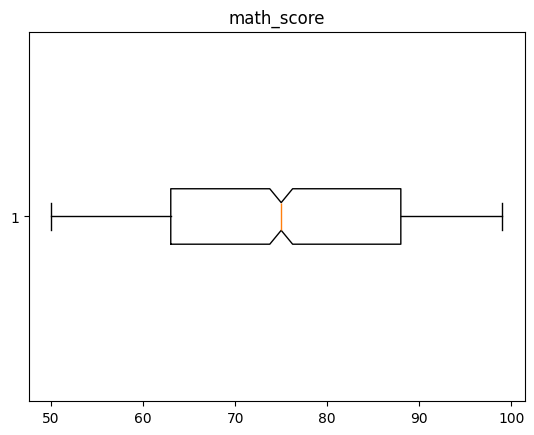

reading_score:
mean: 74.293 
standard deviation: 14.305493734925752


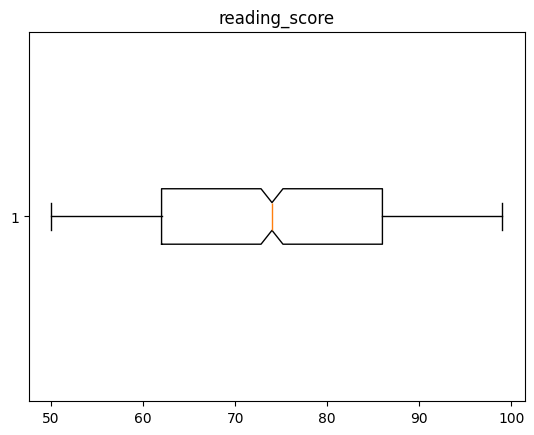

writing_score:
mean: 75.15 
standard deviation: 14.387894217014525


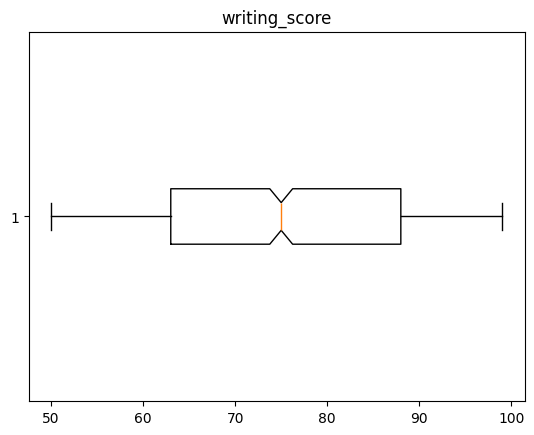

attendance_rate:
mean: 89.87917930734913 
standard deviation: 5.722143488793509


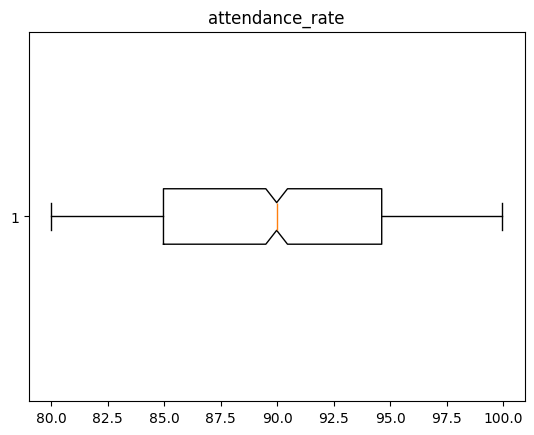

study_hours:
mean: 2.978380122611146 
standard deviation: 1.1671961289331874


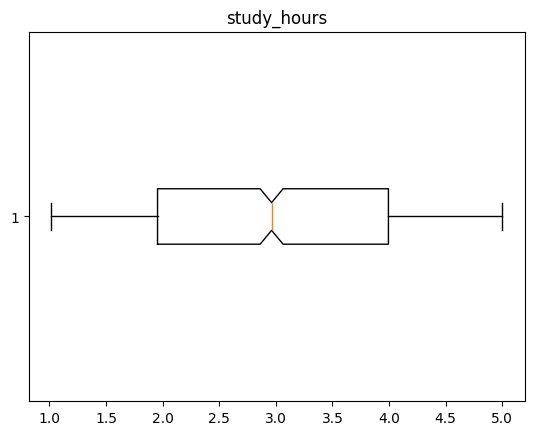

In [7]:
#TODO: D.A. for quants

for column in data[quantitative]:
    plt.boxplot(data[column], orientation='horizontal', notch=True)
    column_mean = np.mean(data[column])
    column_stdev = np.std(data[column])
    print(f"{column}:\nmean: {column_mean} \nstandard deviation: {column_stdev}")
    plt.title(str(column))
    plt.show()


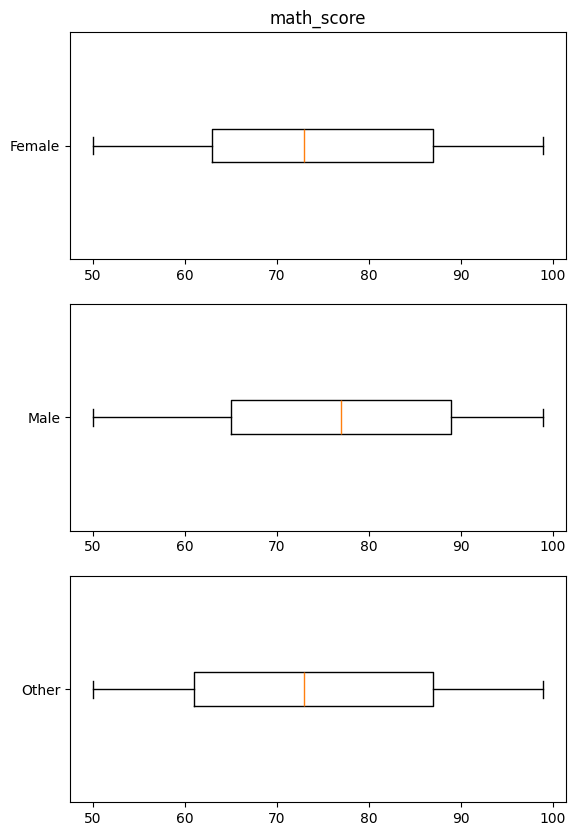

<Figure size 640x480 with 0 Axes>

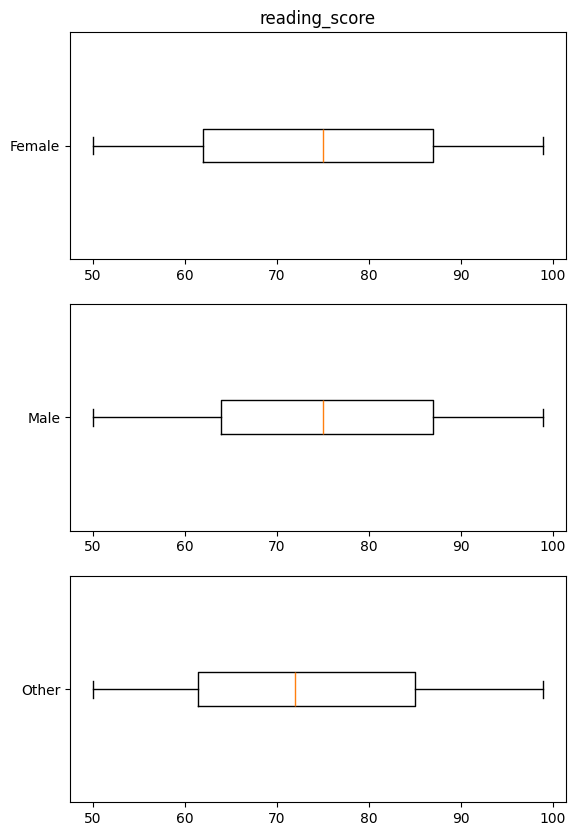

<Figure size 640x480 with 0 Axes>

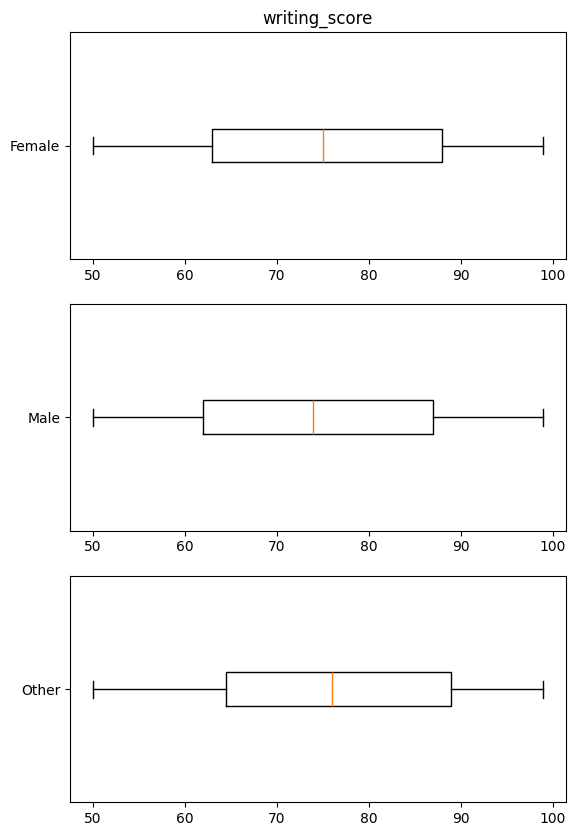

<Figure size 640x480 with 0 Axes>

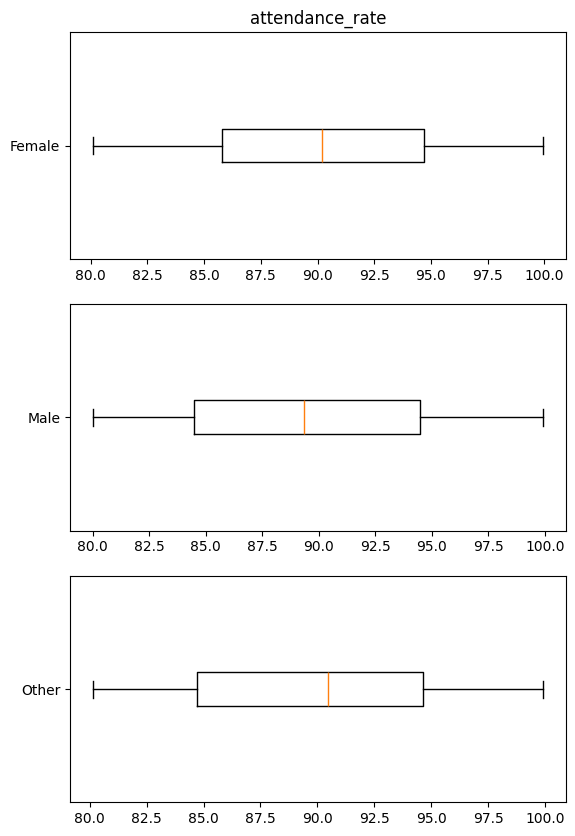

<Figure size 640x480 with 0 Axes>

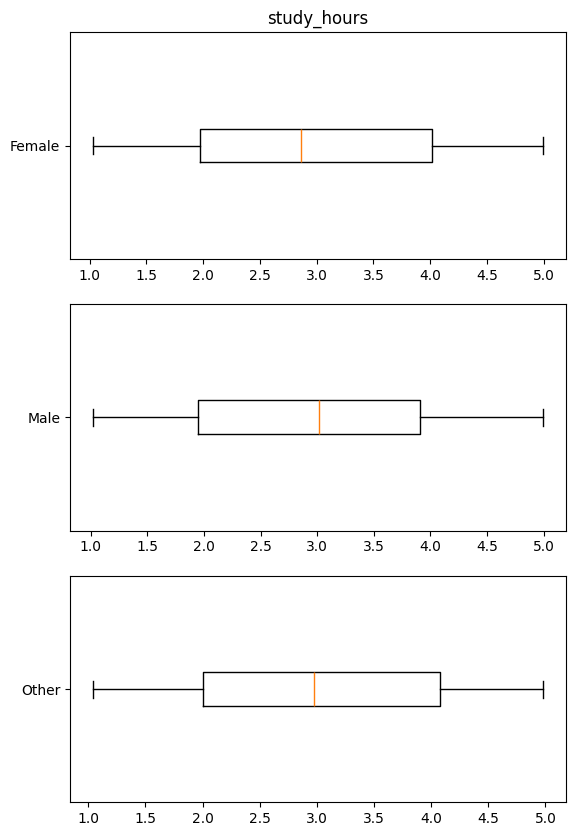

<Figure size 640x480 with 0 Axes>

In [122]:
for quant in quantitative:
    grouped_data = data.groupby('gender')[quant]
    fig,ax = plt.subplots(len(grouped_data))
    ax[0].set_title(quant)
    for i,gdata in enumerate(grouped_data):
        fig.set_figheight(10)
        ax[i].boxplot([*gdata[1]], orientation='horizontal', tick_labels=[gdata[0]])

    plt.show()
    plt.clf()

    

In [ ]:
def func(var, var2:int|float|None = None, *args, **kwargs):
    """
    test function

    Parameters
    ----------
    var : any 
        initial variable of any type
    var2 : int|float|None
        second variable that can be of numeric type or None
    
    
    """
    print(var)
    print(var2)
    print(args)
    print(kwargs)

func(1,2,3,4, this = 4, that = 5)

1
2
(3, 4)
{'this': 4, 'that': 5}


In [100]:
print([data.get(key) for key in data.keys()[2:]])

[0       Other
1        Male
2       Other
3       Other
4        Male
        ...  
995    Female
996    Female
997     Other
998     Other
999      Male
Name: gender, Length: 1000, dtype: object, 0      17
1      17
2      17
3      17
4      15
       ..
995    15
996    17
997    16
998    17
999    17
Name: age, Length: 1000, dtype: int64, 0      10
1      12
2       9
3      12
4       9
       ..
995    10
996    12
997    10
998     9
999     9
Name: grade_level, Length: 1000, dtype: int64, 0      74
1      99
2      59
3      70
4      85
       ..
995    76
996    83
997    60
998    94
999    96
Name: math_score, Length: 1000, dtype: int64, 0      61
1      70
2      60
3      88
4      77
       ..
995    75
996    68
997    77
998    66
999    92
Name: reading_score, Length: 1000, dtype: int64, 0      90
1      91
2      99
3      69
4      94
       ..
995    55
996    98
997    92
998    97
999    93
Name: writing_score, Length: 1000, dtype: int64, 0      94.660002
1    